**Exercise 1**

Consider the karate club graph in the networkx distribution used in Lab5

G = nx.karate_club_graph() 

1. Try to implement the Baryentric heuristic to sort nodes in the arc diagram
2. Use nxviz to display the arc diagram sorted according to the heuristic and with nodes colored according to the node degree

**Exercise 2** 

Load the spotify 30K songs dataset used in HW1. Consider the following tasks (and related target data)
1. Using Plotly, create a treemap, representing the hierarchy of the playlist_genres and subgenres, with box sizes mapped from the number of items, and color mapped from the average popularity. Use a non-default, perceptually uniform sequential colormap and set the color range mapped to the whole range of potential values of the average popularity (0-100). Visualize the same hierarchy tree as a node-link diagram with node size proportional to the number of items, the color proportional to the average popularity
2. Create a simple Dash app with the possibility of selecting the songs of different decades (1950-1960, 1961-1970,…) with a menu and the type of chart (treemap or sunburst) with another menu. The apps should show with the selected chart type the tree representation of the hierarchy: all->genres->subgenres

In [3]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import nxviz as nv
from nxviz import ArcPlot
import matplotlib.colors as mcolors

**EXERCISE 1:**

Create the Karate Club graph from the network Library and visulize the basic graph

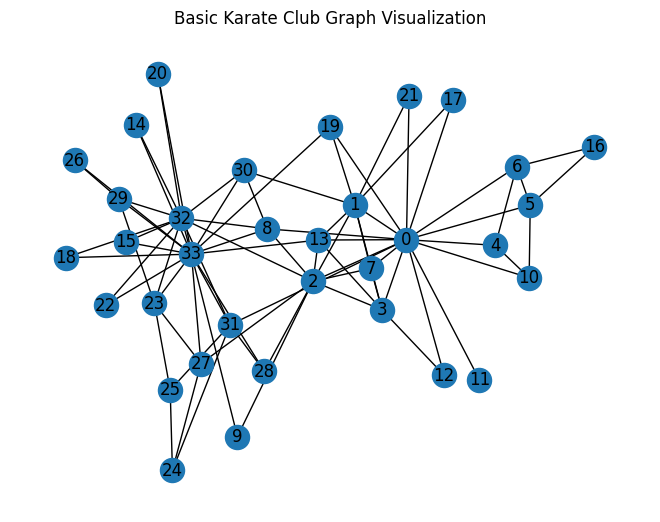

In [9]:
G = nx.karate_club_graph()
nx.draw(G, with_labels = True)
plt.title('Basic Karate Club Graph Visualization')
plt.show()

Create a graphical visualization of a graph as an adjacency matrix using MatrixPlot

C:\Users\Utente\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\nxviz\api.py:275: UserWarning: As of nxviz 0.7, the object-oriented API is being deprecated in favour of a functional API. Please consider switching your plotting code! The object-oriented API wrappers remains in place to help you transition over. A few changes between the old and new API exist; please consult the nxviz documentation for more information. When the 1.0 release of nxviz happens, the object-oriented API will be dropped entirely.
  warnings.warn(


<Figure size 600x600 with 0 Axes>

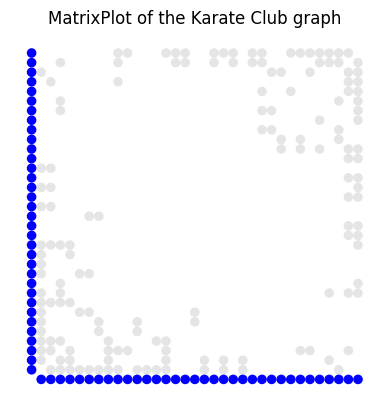

In [11]:
plt.figure(figsize=(6,6))
m = nv.MatrixPlot(G)
plt.title('MatrixPlot of the Karate Club graph')
plt.show()

Visulize an arc plot where nodes are not ordered using ArcPlot (initial unsorted version)

C:\Users\Utente\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\nxviz\api.py:275: UserWarning: As of nxviz 0.7, the object-oriented API is being deprecated in favour of a functional API. Please consider switching your plotting code! The object-oriented API wrappers remains in place to help you transition over. A few changes between the old and new API exist; please consult the nxviz documentation for more information. When the 1.0 release of nxviz happens, the object-oriented API will be dropped entirely.
  warnings.warn(


<Figure size 600x600 with 0 Axes>

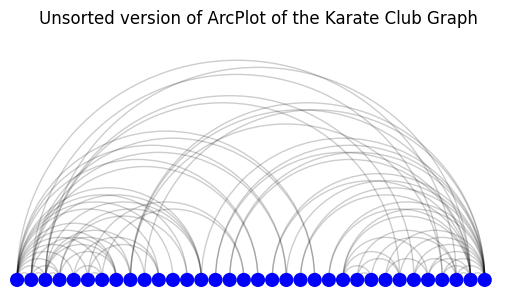

In [12]:
plt.figure(figsize=(6,6))
ap= ArcPlot(G)
plt.title('Unsorted version of ArcPlot of the Karate Club Graph')
plt.show()

Visulize an arc plot where the nodes are ordered and colorated by their degree using ArcPlot

C:\Users\Utente\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\nxviz\api.py:275: UserWarning: As of nxviz 0.7, the object-oriented API is being deprecated in favour of a functional API. Please consider switching your plotting code! The object-oriented API wrappers remains in place to help you transition over. A few changes between the old and new API exist; please consult the nxviz documentation for more information. When the 1.0 release of nxviz happens, the object-oriented API will be dropped entirely.
  warnings.warn(


<Figure size 600x600 with 0 Axes>

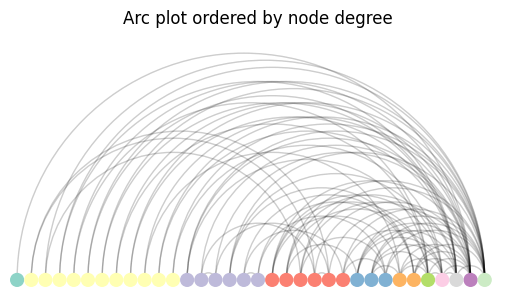

In [13]:
for n, d in G.nodes(data=True):
        G.nodes[n]['degree'] = nx.degree(G, n)

plt.figure(figsize=(6,6))
a = nv.ArcPlot(G, node_order='degree',node_color='degree')
plt.title('Arc plot ordered by node degree')
plt.show()

Now, implement the Baryentric heuristic to sort nodes in the arc diagram

In [14]:
def barycentric_sorting(G, max_iterations = 100):
    #initialize positions: each node starts at its initial index
    positions = {n: i for i, n in enumerate(G.nodes())}

    #perform iterative updates to refine positions
    for _ in range(max_iterations):
        new_positions = {}
        for node in G.nodes():
            #get the neighbors of the current node
            neighbors = list(G.neighbors(node))

            #if the node has no neighbors, keep its position unchanged
            if not neighbors:
                new_positions[node] = positions[node]
            else:
                #calculate the barycenter (average position) of the neighbors
                barycenter = np.mean([positions[neighbor] for neighbor in neighbors])
                new_positions[node] = barycenter

        #sort nodes based on their new barycentric positions
        sorted_nodes = sorted(new_positions, key=new_positions.get)

        #update positions for the next iteration
        positions = {n: i for i, n in enumerate(sorted_nodes)}

    return sorted_nodes

In [15]:
sorted_nodes = barycentric_sorting(G)
sorted_nodes

[16,
 5,
 6,
 4,
 10,
 11,
 0,
 12,
 17,
 21,
 3,
 7,
 1,
 19,
 13,
 2,
 8,
 30,
 9,
 14,
 15,
 18,
 20,
 22,
 28,
 31,
 27,
 23,
 26,
 29,
 24,
 33,
 32,
 25]

Use *nxviz* to display the arc diagram sorted according to the heuristic and with nodes colored according to the node degree

C:\Users\Utente\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\nxviz\api.py:275: UserWarning: As of nxviz 0.7, the object-oriented API is being deprecated in favour of a functional API. Please consider switching your plotting code! The object-oriented API wrappers remains in place to help you transition over. A few changes between the old and new API exist; please consult the nxviz documentation for more information. When the 1.0 release of nxviz happens, the object-oriented API will be dropped entirely.
  warnings.warn(


<Figure size 1000x600 with 0 Axes>

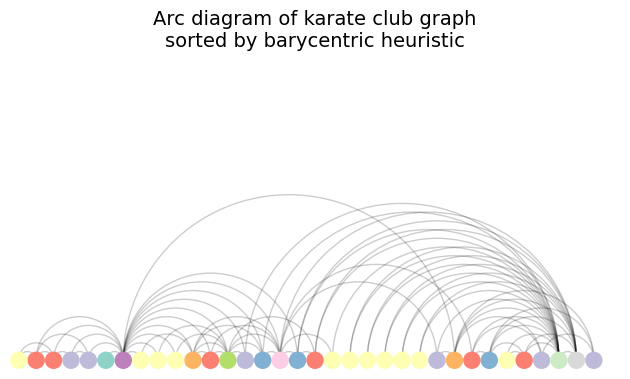

In [16]:
#assign the sorted order as a node attribute for visualization purposes
for i, node in enumerate(sorted_nodes):
    G.nodes[node]['sorted_order'] = i

#create the arc plot with nodes sorted by the barycentric heuristic
#node color is determined by their degree
plt.figure(figsize=(10, 6))
a = ArcPlot(
    G,
    node_order = 'sorted_order',  #use the sorted order for arranging nodes
    node_color = 'degree',        #color nodes by their degree
)

plt.title('Arc diagram of karate club graph\nsorted by barycentric heuristic', fontsize = 14)
plt.tight_layout()
plt.show()

**EXERCISE 2:**

Load the spotify 30K songs dataset used in HW1

In [18]:
songs = pd.read_csv("spotify_songs.csv")

# Check row and column numbers

rows = songs.shape[0] 
cols = songs.shape[1]
print("Rows   : " + str(rows)) 
print("Columns: " + str(cols))


#print(songs.isnull().sum())
songs = songs.dropna() 

# Adding 'release_year' column
songs['year'] = pd.DatetimeIndex(songs['track_album_release_date']).year.astype(int)

songs['duration'] = songs['duration_ms']/1000
songs.sort_values(by='year', ascending=True)
songs.head()

Rows   : 32833
Columns: 23


,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,year,duration
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754,2019,194.754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600,2019,162.600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616,2019,176.616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093,2019,169.093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052,2019,189.052


In [19]:
# Group by genre and subgenre to get the count and average popularity
genre_subgenre = songs.groupby(['playlist_genre', 'playlist_subgenre']).agg(
    count=('track_id', 'size'),
    avg_popularity=('track_popularity', 'mean')
).reset_index()

genre_subgenre

,playlist_genre,playlist_subgenre,count,avg_popularity
0,edm,big room,1206,32.282753
1,edm,electro house,1511,35.510258
2,edm,pop edm,1517,45.686223
3,edm,progressive electro house,1809,26.867883
4,latin,latin hip hop,1655,43.477341
5,latin,latin pop,1262,51.099842
6,latin,reggaeton,948,52.925105
7,latin,tropical,1288,43.327640
8,pop,dance pop,1298,52.079353
9,pop,electropop,1408,42.725142


**PART 1:**

Using Plotly, create a treemap, representing the hierarchy of the playlist_genres and subgenres, with box sizes mapped from the number of items, and color mapped from the average popularity. Use a non-default, perceptually uniform sequential colormap and set the color range mapped to the whole range of potential values of the average popularity (0-100).